# Numerisk laboration I: Neurala nätverk

## Bayesiansk inferens och maskininlärning [TIF385], Chalmers, lp2 2024

Senast uppdaterad: 15-Okt-2024 av Christian Forssén [christian.forssen@chalmers.se]

## Instruktioner
- Se deadline för examination på kurshemsidan.
- Denna numeriska laboration examineras genom individuellt godkänt på obligatoriska uppgifter i Yata, samt genom godkänd redovisning av lösningar och resultat vid en gruppdiskussion som leds av övningsledare.
- Laborationen genomförs individuellt men redovisning sker i seminarieform med flera studenter åt gången.
- Diskussioner och samarbete mellan studenter är tillåtet, men varje student som deltar i en redovisning måste på egen hand kunna svara på frågor kring lösning och tolkning av samtliga delar av laborationen.

### Resultat och figurer
- Vid gruppredovisningen skall varje student vara beredd att köra sin lösningskod och kunna demonstrera resultat via efterfrågade figurer.
- Alla figurer skall vara tydliga att avläsa, med rubriker på axlar och en beskrivning av kurvor och/eller data.
- Ni skall kunna tolka era resultat och förklara hur dessa genererades.

## Uppgift

Det övergripande målet är konstruera ett neuralt nätverk i Python. För storskaliga tillämpningar använder man oftast optimerade programbibliotek som [`tensorflow`](https://www.tensorflow.org/) med omfattande funktionalitet. I denna laboration skall du färdigställa en egen implementering för att tydligare kunna förstå och arbeta med de olika komponenterna. 

Slutmålet är att skapa en Pythonklass för ett neuralt nätverk med ett dolt lager för att sedan initialisera en instans av denna klass som tränas för att kunna "lösa" Schrödingerekvationen för en kvantmekanisk partikel i olika potentiallådor i en dimension.

Mer specifikt så utförs uppgiften i tre steg som beskrivs närmare nedan:

* **Steg 1: Grundfunktionalitet som sedan skall integreras i vår `Neural_Network` python-klass**
* **Steg 2: Bygg klart vår `Neural_Network` python-klass**
* **Steg 3: Skapa och träna ett neuralt nätverk att lösa Schrödingerekvationen**

### Lärandemål
- att förstå och numeriskt implementera flera grundläggande algoritmer som används inom maskininlärning; specifikt betraktas enkla neurala nätverk.
- att använda python för praktisk tillämpning av maskininlärning. 
- att konstruera och utföra en träning av ett neuralt nätverk för simulering av en fysikaliskt relevant differentialekvation.
- att kunna beskriva sin kod och sina resultat på ett effektivt och tydligt sätt.

### Modulimport

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import pandas as pd

## Steg 1 (Grundfunktionalitet som sedan skall integreras i vår `Neural_Network` python-klass)

Här kommer vi att betrakta ett neuralt nätverk med två insignaler $(x_1, x_2)$, ett dolt lager med 100 noder och sigmoid-aktivering, och en utsignal $y$ som är linjär i utsignalsnodens aktivering.

Ett sådant neuralt nätverk har på förhand tränats för att kunna reproducera

$$
y = x_2 / x_1,
$$

med $x_2 \in [0,1]$ och $x_1 \in [1,2]$. Notera att sambandet $y = y(x_1,x_2)$ återskapas genom flexibiliteten hos det neurala nätverket. Modellen vet ingenting om division. Det färdigtränande nätverkets vikter finns i datafiler som laddas in nedan.

#### (a) Examineras i Yata.

    Bygg klart nedan aktiveringsfunktion samt dess derivata.

In [14]:
def sigmoid(z):
    '''
    Apply sigmoid activation function to scalar, vector, or matrix.
    '''
    return 1/(1+np.exp(-z))

def sigmoidPrime(z):
    """
    Gradient of sigmoid with respect to z
    """
    return np.exp(-z)/(1+np.exp(-z))**2

#### (b) Examineras i Yata

    Skapa funktionen `forward` som propagerar Nd instanser med insignaler `[x1,x2]` genom det specifika neurala nätverket. Se specifika designinstruktioner i funktionens docstring.
    
    Testa att funktionen fungerar med de inladdade vikterna så att
    
    `forward(X)`
    
    (förhoppningsvis) returnerar en (Nd,1) array med kvoter x2/x1 där `[x1,x2]` är rader i argumentet `X`, vilket alltså i sin tur är en (Nd,2) array.

#### Tips
- Fundera först (gärna med penna och papper) vad det är för beräkningar som skall utföras. Det är sällan en god idé att börja med kodandet innan man har klart för sig vad som skall implementeras.
- Se gärna relevanta avsnitt i kurskompendiet.
- Använd `numpy` matris- och vektoroperationer istället för `for` loopar.

In [15]:
# Färdigtränade vikter som skall användas i funktionen nedan.
# Notera att vi inte använder några biasvikter i detta exempel.

# Define weight matrices W1 (2,100) and W2 (100,1)
W1 = np.load('W1_step1.npy')
W2 = np.load('W2_step1.npy')

def forward(X):
    '''
    Propagate X through a NN to produce an output yhat.
    
    Args:
        X: ndarray (Ndata, 2)
            Input data
        
    Returns:
        yhat: ndarray (Ndata, 1)
            Response
            
    Input layer: 2 inputs
    Hidden layer: 100 neurons (weights in W1, shape (2,100))
    Output layer: 1 output (weights in W2, shape (100,1))
        
    The activation of neuron j in the hidden layer is*
    
    z1[j] = X[0] * W1[0,j] + X[1] * W1[1,j]
    
    and we use a sigmoid activation function
    
    y1 = f(z1) = 1 / (1 + exp(-z1))
    
    The activation of the output neutron is*
    
    z2 = sum_k ( y1[k] * W2[k,0] )
    
    and we use a linear output in the output layer
    
    yhat = z2
    
    Note that there is no bias in this example
    '''
    
    z1 = np.matmul(X,W1)
    y1 = sigmoid(z1)
    z2 = np.matmul(y1,W2)
    yhat = z2
    
    return yhat
print(forward([1,1]))

[1.00023172]


## Steg 2 (Bygg klart vår `Neural_Network` python-klass)

#### (a) Examineras i Yata
  
    Lägg till följande funktionalitet till nedan python class `Neural_Network`:
    - funktionerna `sigmoid` och `sigmoidPrime` från Steg 1 (men anpassade för att vara metoder i en python-klass)
    - funktionen `forward` från Steg 1 (men anpassad för att vara en metod i en python-klass)

#### (b) Examineras i Yata
  
    Lägg till följande funktionalitet till nedan python class `trainer`:
    - funktionen `score` som kan beräkna ett MSE (mean-squared error) felmått för given data.

Kort sammanfattning av det du behöver veta om python-klasser:
- En **klass** innehåller funktionalitet som man vill kunna återanvända. Nedan finner vi klasserna `Neural_Network` som låter oss definiera olika versioner av ett neuralt nätverk med ett dolt lager, samt `trainer` som låter oss träna ett neuralt nätverk.
- Specifikt kan man skapa flera **instanser** av en klass, där varje instans kan betraktas som en egen kopia med sina egna egenskaper (attribut).
- Inuti en klass kan man definiera olika **attribut** (variabler) och **metoder** (funktioner) som sedan kan utnyttjas internt i klassen genom anrop `self.var` för en variabel `var`, eller `self.func()` för en funktion `func`.
- Dessa attribut kan till exempel initialiseras vid det första anropet. Säg till exempel att vi skapar instansen

  `NN = Neural_Network(insize=2,outsize=1,hiddensize=100, output='linear')`
  
  Då finner vi att `NN.outputLayerSize` returnerar 1 (se initialiseringsmetoden `__init__` nedan).
- Metoder som definieras inne i en klass måste ha `self` som sitt första argument.
- Metoden `__init__` är speciell då den alltid körs när en instans av en klass skapas. Här brukar man initialisera viktiga attribut som beskriver just denna instans av klassen.

In [16]:
class Neural_Network(object):
    
    def __init__(self, insize=2, outsize=1, hiddensize=3, output='linear'):
        #Define Hyperparameters
        self.inputLayerSize = insize
        self.outputLayerSize = outsize
        self.hiddenLayerSize = hiddensize
        if output=='linear':
            self.output = self.linear
            self.outputPrime = self.linearPrime
        elif output=='sigmoid':
            self.output = self.sigmoid
            self.outputPrime = self.sigmoidPrime

        # Initialize weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        """
        Propogate inputs through network
        
        Note: 
        refer to weight arrays as 
        self.W1
        self.W2
        
        and the hidden layer output
        self.y1
        
        and activations
        self.z1
        self.z2       
        """
        
        self.z1 = np.matmul(X,self.W1)
        self.y1 = self.sigmoid(self.z1)
        self.z2 = np.matmul(self.y1,self.W2)
        # Output...
        # note how we employ the output method that has been defined at initialization
        return self.output(self.z2)

    def linear(self, z):
        """Apply linear activation function to scalar, vector, or matrix"""
        return z

    def linearPrime(self,z):
        """Gradient of linear with respect to z"""
        return np.ones_like(z)

    def sigmoid(self, z):
        """Apply sigmoid activation function to scalar, vector, or matrix"""
        return 1/(1+np.exp(-z))

    def sigmoidPrime(self,z):
        """Gradient of sigmoid with respect to z"""
        return np.exp(-z)/(1+np.exp(-z))**2

    def costFunction(self, X, y):
        """Compute cost for given X,y, use weights already stored in class."""
        self.yHat = self.forward(X)
        C = 0.5*sum((y-self.yHat)**2)
        return C
    
    def delta_output(self, y):
        return np.multiply(-(y-self.yHat), self.outputPrime(self.z2))

    def costFunctionPrime(self, X, y):
        """Compute derivative with respect to W and W2 for a given X and y"""
        self.yHat = self.forward(X)

        # Derivative of output layer with respect to z2
        delta2 = self.delta_output(y)
        dCdW2 = np.dot(self.y1.T, delta2)

        delta1 = np.dot(delta2, self.W2.T)*self.sigmoidPrime(self.z1)
        dCdW1 = np.dot(X.T, delta1)

        return dCdW1, dCdW2

    #Helper Functions for interacting with other classes:
    def getParams(self):
        """Get W1 and W2 unrolled into a single array"""
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params

    def setParams(self, params):
        """Set W1 and W2 using a single parameter array."""
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize)
                            )
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
  
    def computeGradients(self, X, y):
        dCdW1, dCdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dCdW1.ravel(), dCdW2.ravel()))

In [17]:
class Trainer(object):
    
    def __init__(self, N, maxiter=200, disp=True):
        """
        Initialize an object for training of a neural network.
        
        Args:
            N: reference to an instance of the Neural_Network class.
            maxiter: maximum number of iterations for the BFGS optimization (default: 200).
            disp: verbose output from optimization (default: True)
        """
        self.N = N
        self.maxiter = maxiter
        self.disp = disp

    def callbackF(self, params):
        self.N.setParams(params)
        self.C.append(self.N.costFunction(self.X, self.y))
        self.train_score.append(self.score(self.X, self.y))
        if not (self.yval is None or self.Xval is None):
            self.val_score.append(self.score(self.Xval, self.yval))

    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        return cost, grad
    
    def score(self, X, y):
        """
        MSE score
        
        Evaluate the NN output 'yhat' for input X 
        and compare with the observed output 'y'
        """
        yhat = self.N.forward(X)
        MSE = (np.matmul((y-yhat).T,(y-yhat)))/len(y)
        return MSE[0]

    def train(self, X, y, Xval=None, yval=None):
        """Make internal variables for the callback function"""
        self.X = X
        self.y = y
        self.Xval = Xval
        self.yval = yval

        #Make empty list to store costs:
        self.C = []
        self.train_score = []
        self.val_score = []

        params0 = self.N.getParams()

        # Here we use an optimization method (the Broyden–Fletcher–Goldfarb–Shanno algorithm)
        # that tries to minimize the cost function by employing gradient information returned by
        # the `costFunctionWrapper` method defined above.
        options = {'maxiter': self.maxiter, 'disp' : self.disp}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
        args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

## Steg 3 (Skapa och träna ett neuralt nätverk att lösa Schrödingerekvationen)

#### (a) Figur 1

     Konstruera och träna ett neuralt nätverk enligt nedan instruktioner. Rita upp en inlärningskurva som visar MSE för träningsdata samt MSE för valideringsdata som en funktion av optimeringsiteration. 
     - Vad har ni valt för arkitektur och hur många parametrar har ert nätverk?
     - Finns det tecken på överanpassning?

#### (b) Figur 2

     Jämför hur ert färdigtränade neurala nätverk reproducerar de exakta energierna i träningsdata samt hur väl den reproducerar energierna i valideringsdata.
     - Finns det tecken på snedvriden träningsdata?

#### Schrödingerekvationen

Problemet som betraktas i denna uppgift är Schrödingerekvationen för en kvantmekanisk partikel som befinner sig i en endimensionell lådpotential $V(x)$ med oändliga väggar $V(x=0) = V(x=1) = \infty$.

Partikelns tillstånd kommer att beskrivas av en vågfunktion $\Psi(x)$ som i sin tur är en lösning till Schrödingerekvationen

$$
\hat{H} \Psi = E \Psi,
$$

där $\hat{H}$ är Hamiltonoperatorn som innehåller potentialfunktionen samt en differentialoperator vilken beskriver partikelns kinetiska energi. Vi kommer inte att beskriva denna operator närmare (det kommer i kvantfysikkursen) utan enbart konstatera att problemet motsvarar en så kallad egenekvation med (åtminstone) en lösning för en diskret egenenergi $E$. Det är denna storhet som vi söker.

Den data som laddas nedan motsvarar flera olika fall där någon har löst Schrödingerekvationen för en viss potential $V(x)$ och hittat egenenergien $E$. Indata är $V_i \equiv V(x_i)$ för 127 punkter så att $V(x_0)$ är den första punkten till höger om potentialväggen vid $x=0$ och $V(x_{126})$ är alldeles till vänster om potentialväggen vid $x=1$.

Sambandet ser alltså ut som följer:

$(V_0, V_1, \ldots, V_{126})$ $\Rightarrow$ Hamiltonoperatorn $\Rightarrow$ Lös Schrödingerekvationen $\Rightarrow$ $E$

Vår uppgift är istället att:
- Konstruera ett neuralt nätverk (med ett enda gömt lager) som...
- ... givet en uppsättning med träningsdata, där `trainx` motsvarar olika potentialer och `trainy` är motsvarande egenenergier,
- ... kan tränas så att det sedan kan förutsäga egenenergien för andra potentiallådor (som inte var med i träningsdatan).

#### Tips
- Fundera först på hur in- och utlagren skall se ut för att passa med problemet som skall lösas.
- Välj sedan storlek på det gömda lagret och tänk på att det kan ta väldigt lång tid att träna nätverket om det totala antalet vikter blir för stort. Ni får gärna prova er fram, men ett par tusen vikter borde gå att hantera.
- Initialisera sedan en instans av klassen `Neural_Network`, t.ex. med `NN = Neural_Network(...argument här...)`
- För att kunna träna nätverket behöver ni initialisera en instans av klassen `Trainer` med referensen till ert nätverk som första argument: `T = Trainer(NN, ... ev andra argument...)`
- Själva träningen utförs med metoden `train()`. Genom att ni implementerade metoden `score` i Steg 2 kommer MSE för träningsdata att beräknas i varje iteration av gradientstegsoptimeringen. Om ni ger valideringsdata som ett argument till `train` kommer även MSE för den att beräknas. Titta gärna på dessa mått för att uppskatta hur väl träningen fungerar.

### Nedladdning av data

         Current function value: 0.034301
         Iterations: 200
         Function evaluations: 208
         Gradient evaluations: 208


c:\Users\blend\anaconda3\Lib\site-packages\scipy\optimize\_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


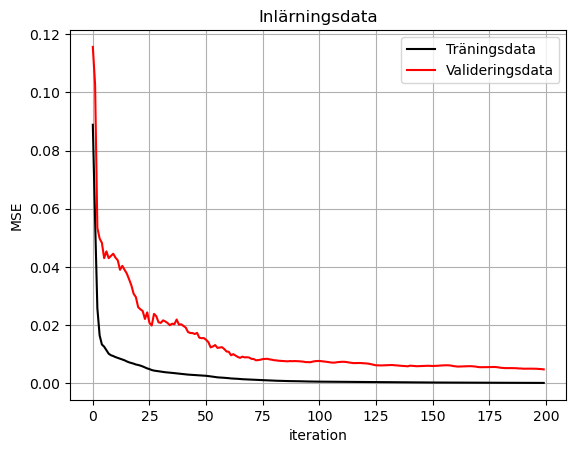

C:\Users\blend\AppData\Local\Temp\ipykernel_10496\1647056884.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot([min(trainy), max(trainy)], [min(trainy), max(trainy)], "k--", label="perfekt linje", color="red")
C:\Users\blend\AppData\Local\Temp\ipykernel_10496\1647056884.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot([min(validy), max(validy)], [min(validy), max(validy)], "k--", label="perfekt linje", color="red")


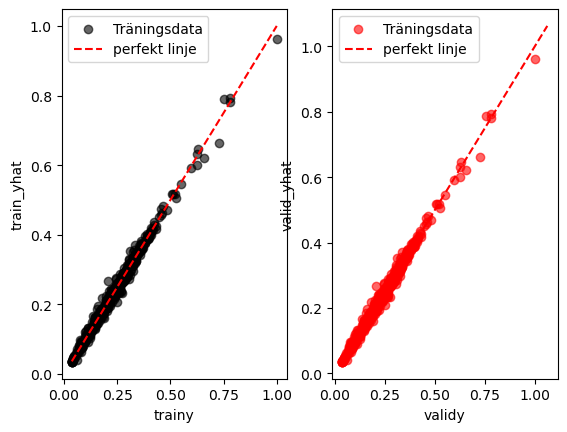

In [ ]:
# Tränings- och valideringsdata till Steg 3
trainx = np.load("trainx_step3.npy")
trainy = np.load("trainy_step3.npy")
validx = np.load("validx_step3.npy")
validy = np.load("validy_step3.npy")

NN = Neural_Network(insize=127, outsize=1, hiddensize=32, output="linear")
T = Trainer(NN, maxiter=200, disp=True)

T.train(trainx, trainy, Xval=validx, yval=validy)

plt.plot(T.train_score, label="Träningsdata", color="black")
plt.plot(T.val_score, label="Valideringsdata", color="red")
plt.title("Inlärningsdata")
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

train_yhat = NN.forward(trainx)
train_MSE = (np.matmul((trainy-train_yhat).T,(trainy-train_yhat)))/len(trainy)

valid_yhat = NN.forward(validx)
valid_MSE = (np.matmul((validy-valid_yhat).T,(validy-valid_yhat)))/len(validy)

fig, ax = plt.subplots(1,2)
ax[0].scatter(trainy, train_yhat, label="Träningsdata", color="black", alpha=0.6)
ax[0].plot([min(trainy), max(trainy)], [min(trainy), max(trainy)], "k--", label="perfekt linje", color="red")
ax[0].set_xlabel("trainy")
ax[0].set_ylabel("train_yhat")
ax[0].legend()

ax[1].scatter(trainy, train_yhat, label="Träningsdata", color="black", alpha=0.6)
ax[1].plot([min(validy), max(validy)], [min(validy), max(validy)], "k--", label="perfekt linje", color="red")
ax[1].set_xlabel("validy")
ax[1].set_ylabel("valid_yhat")
ax[1].legend()
plt.show()